# Code Single Layer Perceptron from Scratch 
###  -   Using a bit table of any bit 
###  -   Apply Group Wise Training and Compare with the Scratch one




Audity Ghosh
<br>CSE, RUET

#### Objectives:
- Implement Single Layer Perceptron with Python
- How Widrow-Hoff-Delta Rule works?
- Train Group Wise ( 0 1 Group Seperately )
- Built perceptron with any number of features 
- Comparison using accuracy



#### References:
[1] Widrow-Hoff-Delta Rule https://books.google.fm/books?id=pVR9W5LEZUwC&printsec=frontcover#v=onepage&q&f=false


### Import libraries

In [964]:
import numpy as np
import pandas as pd
from math import sqrt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import time
import random
from operator import ixor
from functools import reduce

## 1. Define Problem 

### Load data,  Two Classes

In [965]:
no_bit = 3

In [966]:
import itertools


ds = []
word = '0'*no_bit
ds.append(word)

[
    ds.append(num)
    for num in (''.join(p) for p in itertools.product('01', repeat=no_bit)) 
    if not num.startswith(word)
]

print(ds)




['000', '001', '010', '011', '100', '101', '110', '111']


In [967]:
labels = [random.randint(0,1) for _ in range(len(ds))]
labels

[0, 0, 0, 1, 0, 0, 0, 0]

In [968]:
data = []
cnt = 0



for string in ds:
    l = []
    for char in string:
        l.append(int(char))
        
    
    l.append(labels[cnt])
    
        
        
    cnt = cnt + 1
    data.append(l)

In [969]:
data

[[0, 0, 0, 0],
 [0, 0, 1, 0],
 [0, 1, 0, 0],
 [0, 1, 1, 1],
 [1, 0, 0, 0],
 [1, 0, 1, 0],
 [1, 1, 0, 0],
 [1, 1, 1, 0]]

In [970]:
col = []
for i in range(len(data[0])-1):
    col.append("X"+str(i+1))
col.append("Output")
col

['X1', 'X2', 'X3', 'Output']

In [971]:
data = pd.DataFrame(data, columns=col)
data

,X1,X2,X3,Output
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,1,1
4,1,0,0,0
5,1,0,1,0
6,1,1,0,0
7,1,1,1,0


In [972]:
data.shape

(8, 4)

In [973]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   X1      8 non-null      int64
 1   X2      8 non-null      int64
 2   X3      8 non-null      int64
 3   Output  8 non-null      int64
dtypes: int64(4)
memory usage: 384.0 bytes


In [974]:
data.describe()

,X1,X2,X3,Output
count,8.000000,8.000000,8.000000,8.000000
mean,0.500000,0.500000,0.500000,0.125000
std,0.534522,0.534522,0.534522,0.353553
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.500000,0.000000
75%,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000


In [975]:
data['Output'].value_counts()

0    7
1    1
Name: Output, dtype: int64

#### Convert dataframe to 2D List

In [976]:
df = data

In [977]:
data = data.values.tolist()

In [978]:
data

[[0, 0, 0, 0],
 [0, 0, 1, 0],
 [0, 1, 0, 0],
 [0, 1, 1, 1],
 [1, 0, 0, 0],
 [1, 0, 1, 0],
 [1, 1, 0, 0],
 [1, 1, 1, 0]]

## 2. Design Architecture

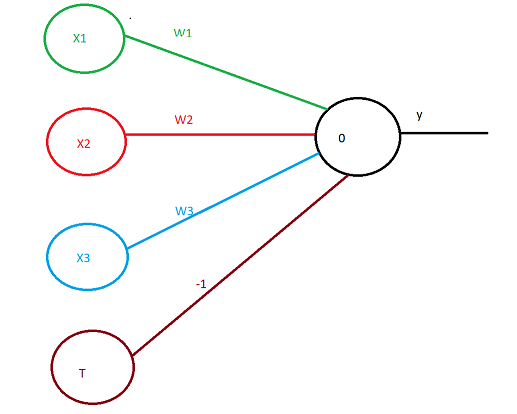

## 3. Implement Algorithm

### 3.1. Initialize weights, threshold, gain term

In [979]:
weights = np.random.rand(len(data[0])-1)
weights

array([0.74400386, 0.5454287 , 0.5231574 ])

In [980]:
threshold = 0.5

In [981]:
gain_term = 0.9

### 3.2. Present Input and Desired output

In [982]:
df

,X1,X2,X3,Output
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,1,1
4,1,0,0,0
5,1,0,1,0
6,1,1,0,0
7,1,1,1,0


### 3.3. Calculate actual output

In [983]:
# Make a prediction with weights
def predict(row, weights):
    activation = -1*threshold
    for i in range(len(row)-1):
        activation += weights[i] * row[i]
    return 1.0 if activation >= 0.0 else 0.0

In [984]:
for row in data:
    print("desired ",row[-1],": actual ",predict(row,weights))

desired  0 : actual  0.0
desired  0 : actual  1.0
desired  0 : actual  1.0
desired  1 : actual  1.0
desired  0 : actual  1.0
desired  0 : actual  1.0
desired  0 : actual  1.0
desired  0 : actual  1.0


### 3.4. Adapt Weights

In [985]:
def adapt_weights(data,weights):
    start_time = time.time() # note starting time 
    i=0
    while(i<len(data)):
        #print("i",i)
        row = data[i]
        actual_output = predict(row,weights)

        desired_output = row[-1]

        #print(row,desired_output,actual_output,weights)

        if(desired_output==0 and actual_output==1):
            weights = [element1 - gain_term*element2 for (element1, element2) in zip(weights,row[:-1])]
            i=0
            continue


        elif(desired_output==1 and actual_output==0):
            weights = [element1 + gain_term*element2 for (element1, element2) in zip(weights,row[:-1])]
            i=0
            continue
        i=i+1
    
    end_time = time.time()
    print("training time, ",end_time-start_time," seconds")
    print()
        
    return weights
        
    
    
    
            
    
    
        
        
    
    

## Train from initial sample and Test 

In [986]:
def predict_acc(train_percent,test_percent):
    
    train = df.sample(frac = train_percent/100,random_state = 42).values.tolist()
    
    test = []
    for row in data:
        if row not in train:
            test.append(row)
            
    
    
    
    weights = np.random.rand(len(train[0])-1)
    threshold = 0.5

    adapt_weights(train,weights)

    cnt = 0

    for row in test:

        actual_output = predict(row,weights)
        desired_output = row[-1]

        print("de",desired_output,"ac",actual_output)

        if(actual_output==desired_output):
            cnt+=1

    return cnt/len(test)*100.0


### 60-40

In [987]:
predict_acc(60,40)

training time,  0.0  seconds

de 1 ac 0.0
de 0 ac 1.0
de 0 ac 1.0


0.0

## 70-30

In [988]:
predict_acc(70,30)

training time,  0.0  seconds

de 1 ac 1.0
de 0 ac 1.0


50.0

## 80 - 20

In [989]:
predict_acc(80,20)

training time,  0.0  seconds

de 1 ac 0.0
de 0 ac 1.0


0.0

## Train Class Wise and Test

In [990]:
def adapt_weights_class_wise(data,weights):
    start_time = time.time() # note starting time 
    i=0
    while(i<len(data)):
        #print("i",i)
        row = data[i]
        actual_output = predict(row,weights)

        desired_output = row[-1]

        #print(row,desired_output,actual_output,weights)

        if(desired_output==0 and actual_output==1):
            weights = [element1 - gain_term*element2 for (element1, element2) in zip(weights,row[:-1])]
            i=0
            continue


        elif(desired_output==1 and actual_output==0):
            weights = [element1 + gain_term*element2 for (element1, element2) in zip(weights,row[:-1])]
            i=len(data)//2
            continue
        i=i+1
    
    end_time = time.time()
    print("training time, ",end_time-start_time," seconds")
    print()
    
    print("Batch wise weight, ",weights)
    print()
    
    i=0
    while(i<len(data)):
        #print("i",i)
        row = data[i]
        actual_output = predict(row,weights)

        desired_output = row[-1]

        #print(row,desired_output,actual_output,weights)

        if(desired_output==0 and actual_output==1):
            weights = [element1 - gain_term*element2 for (element1, element2) in zip(weights,row[:-1])]
            i=0
            continue


        elif(desired_output==1 and actual_output==0):
            weights = [element1 + gain_term*element2 for (element1, element2) in zip(weights,row[:-1])]
            i=0
            continue
        i=i+1
    
    print("Total updated weight, ",weights)
    print()
    return weights

In [991]:
def predict_acc(train_percent,test_percent):
    
    train = df.sample(frac = train_percent/100,random_state = 200).values.tolist()
    
    test = []
    for row in data:
        if row not in train:
            test.append(row)
            
    
    
    
    weights = np.random.rand(len(train[0])-1)
    threshold = 0.5

    adapt_weights_class_wise(train,weights)

    cnt = 0

    for row in test:

        actual_output = predict(row,weights)
        desired_output = row[-1]

        print("de",desired_output,"ac",actual_output)

        if(actual_output==desired_output):
            cnt+=1

    return cnt/len(test)*100.0


In [992]:
predict_acc(60,40)

training time,  0.0  seconds

Batch wise weight,  [-1.4926323527583065, 0.5018895137188099, 0.8184837184046853]

Total updated weight,  [-1.4926323527583065, 0.5018895137188099, 0.8184837184046853]

de 0 ac 0.0
de 0 ac 1.0
de 0 ac 1.0


33.33333333333333

In [993]:
predict_acc(70,30)

training time,  0.0  seconds

Batch wise weight,  [-1.7992172085022702, 0.47464665754388713, 1.5835851988797573]

Total updated weight,  [-1.7992172085022702, 0.47464665754388713, 1.5835851988797573]

de 0 ac 1.0
de 0 ac 0.0


50.0

In [994]:
predict_acc(80,20)

training time,  0.0  seconds

Batch wise weight,  [-1.7196864557100033, 1.3171991993141738, 0.8539180277632187]

Total updated weight,  [-1.7196864557100033, 1.3171991993141738, 0.8539180277632187]

de 0 ac 1.0
de 0 ac 0.0


50.0